Підготовка данних і навчання моделей

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Завантаження даних
data = pd.read_csv("zoo.csv")

# Розділення на X і y
X = data.iloc[:, 1:-1]  # Всі стовпці, крім animal_name та class_type
y = data["class_type"]

# Нормалізація вхідних даних
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Кодування міток
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(set(y)), activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

# Оцінка моделі
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/50


c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.4329 - loss: 1.7184 - val_accuracy: 0.6667 - val_loss: 1.4212
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8127 - loss: 1.3524 - val_accuracy: 0.8095 - val_loss: 1.0816
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8537 - loss: 1.0218 - val_accuracy: 0.8571 - val_loss: 0.8264
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9558 - loss: 0.7733 - val_accuracy: 0.9524 - val_loss: 0.6583
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9343 - loss: 0.6536 - val_accuracy: 0.9524 - val_loss: 0.5450
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9303 - loss: 0.5094 - val_accuracy: 0.9524 - val_loss: 0.4709
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9462 - loss: 0.4194 - val_accuracy: 0.9524 - val_loss: 0.4114
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9007 - loss: 0.3816 - val_accuracy: 0.9524 - val_loss: 0.366

Регресія

In [6]:
# Розділення на X і y для регресії
y_reg = data["legs"]

# Нормалізація вхідних даних
X = scaler.fit_transform(X)

# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Побудова моделі
reg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Компіляція моделі з MSE та MAE як метриками
reg_model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Навчання моделі
reg_history = reg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

# Оцінка моделі
reg_loss, reg_mae, reg_mse = reg_model.evaluate(X_test, y_test)
print(f"Test MAE: {reg_mae}")
print(f"Test MSE: {reg_mse}")



c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 10.7210 - mae: 2.7988 - mse: 10.7210 - val_loss: 8.0675 - val_mae: 2.4480 - val_mse: 8.0675
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2192 - mae: 2.3027 - mse: 8.2192 - val_loss: 5.3066 - val_mae: 1.9730 - val_mse: 5.3066
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5553 - mae: 1.8723 - mse: 5.5553 - val_loss: 3.3552 - val_mae: 1.6158 - val_mse: 3.3552
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2783 - mae: 1.4826 - mse: 3.2783 - val_loss: 2.1134 - val_mae: 1.2508 - val_mse: 2.1134
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.6550 - mae: 1.1992 - mse: 2.6550 - val_loss: 1.5752 - val_mae: 1.0072 - val_mse: 1.5752
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2699 - mae: 0.8619 - mse: 1.2699 - val_loss: 1.3976 - val_mae: 0.8370 - val_mse: 1.3976
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0430 - mae: 0.7581 - mse: 1.0430 - val_loss

Візуалізація результатів

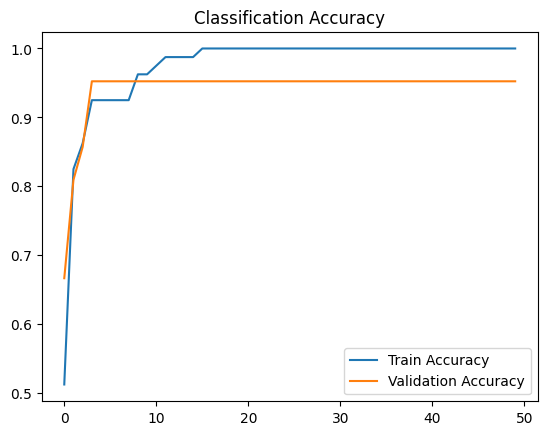

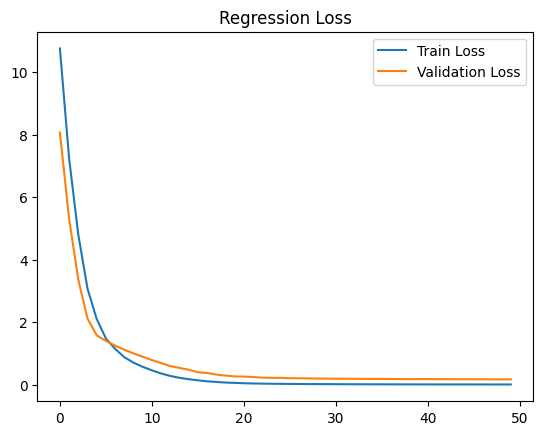

In [7]:
import matplotlib.pyplot as plt

# Візуалізація для класифікації
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Classification Accuracy")
plt.show()

# Візуалізація для регресії
plt.plot(reg_history.history['loss'], label='Train Loss')
plt.plot(reg_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Regression Loss")
plt.show()
